Tratamento do Dataset

In [72]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [12]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [2]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

1974 2024


#### correção: 'milage' -> INT

In [78]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

TypeError: expected string or bytes-like object, got 'int'

In [77]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [79]:
data.describe()

,model_year,milage,price
count,3207.000000,3207.000000,3.207000e+03
mean,2015.517930,64594.983785,4.487024e+04
std,6.131963,52387.260707,8.382969e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23151.500000,1.705000e+04
50%,2017.000000,52253.000000,3.169800e+04
75%,2020.000000,93450.000000,4.999650e+04
max,2024.000000,405000.000000,2.954083e+06


#### NULL's

In [76]:
data.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       147
engine            0
transmission      0
ext_col           0
int_col           0
accident         89
clean_title     467
price             0
dtype: int64

#### counts

In [40]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

clean_title
Yes    2740
Name: count, dtype: int64

In [49]:
len(data['milage'])
# len(data['milage'].unique())

3207

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [23]:
data.loc[data['fuel_type'] == '–'].head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
120,Mazda,Mazda6 i Grand Touring,2016,"83,100 mi.",–,–,A/T,White,White,None reported,Yes,17800
143,Chevrolet,Sonic LT,2013,"110,000 mi.",–,–,A/T,Gray,Black,None reported,Yes,7500
621,Porsche,911 Carrera Cabriolet,1996,"38,000 mi.",–,–,Transmission w/Dual Shift Mode,Blue,Gray,NaN,NaN,75000
655,Mazda,Protege DX,1993,"94,200 mi.",–,–,A/T,Gray,–,At least 1 accident or damage reported,Yes,2500
714,Chrysler,Pacifica Touring,2017,"87,305 mi.",–,–,9-Speed A/T,Silver,Black,None reported,Yes,9000


In [27]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [28]:
elec=data[data['fuel_type'].isnull()].head()

In [22]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric] 

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


###### os carros com NaN para 'fuel_type' são carros elétricos

### gráficos

#### BOXPLOT

model_year       Axes(0.125,0.11;0.227941x0.77)
milage        Axes(0.398529,0.11;0.227941x0.77)
price         Axes(0.672059,0.11;0.227941x0.77)
dtype: object

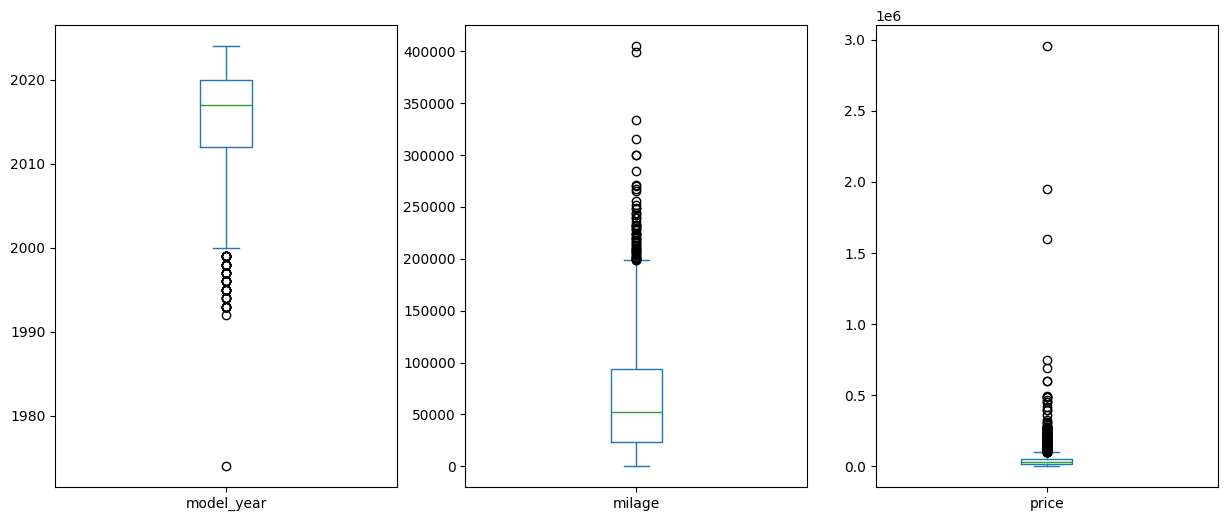

In [12]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [29]:
data[data['model_year']<1990] # outlier do 1º gráfico

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3143,Ford,Bronco,1974,"6,217 mi.",–,–,–,Dark Gray Metallic,–,None reported,Yes,115000


In [32]:
data[data['milage']>350000] # outlier do 2º gráfico

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
881,Mercedes-Benz,Sprinter 2500,2016,399000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,Silver,–,At least 1 accident or damage reported,Yes,24500
1690,Honda,Accord Sport,2013,405000,Gasoline,185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Black,Black,None reported,Yes,6000


In [33]:
data[data['price']>1500000] # outlier 3º gráfico

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1650,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
2484,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
2564,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000


#### BARPLOT

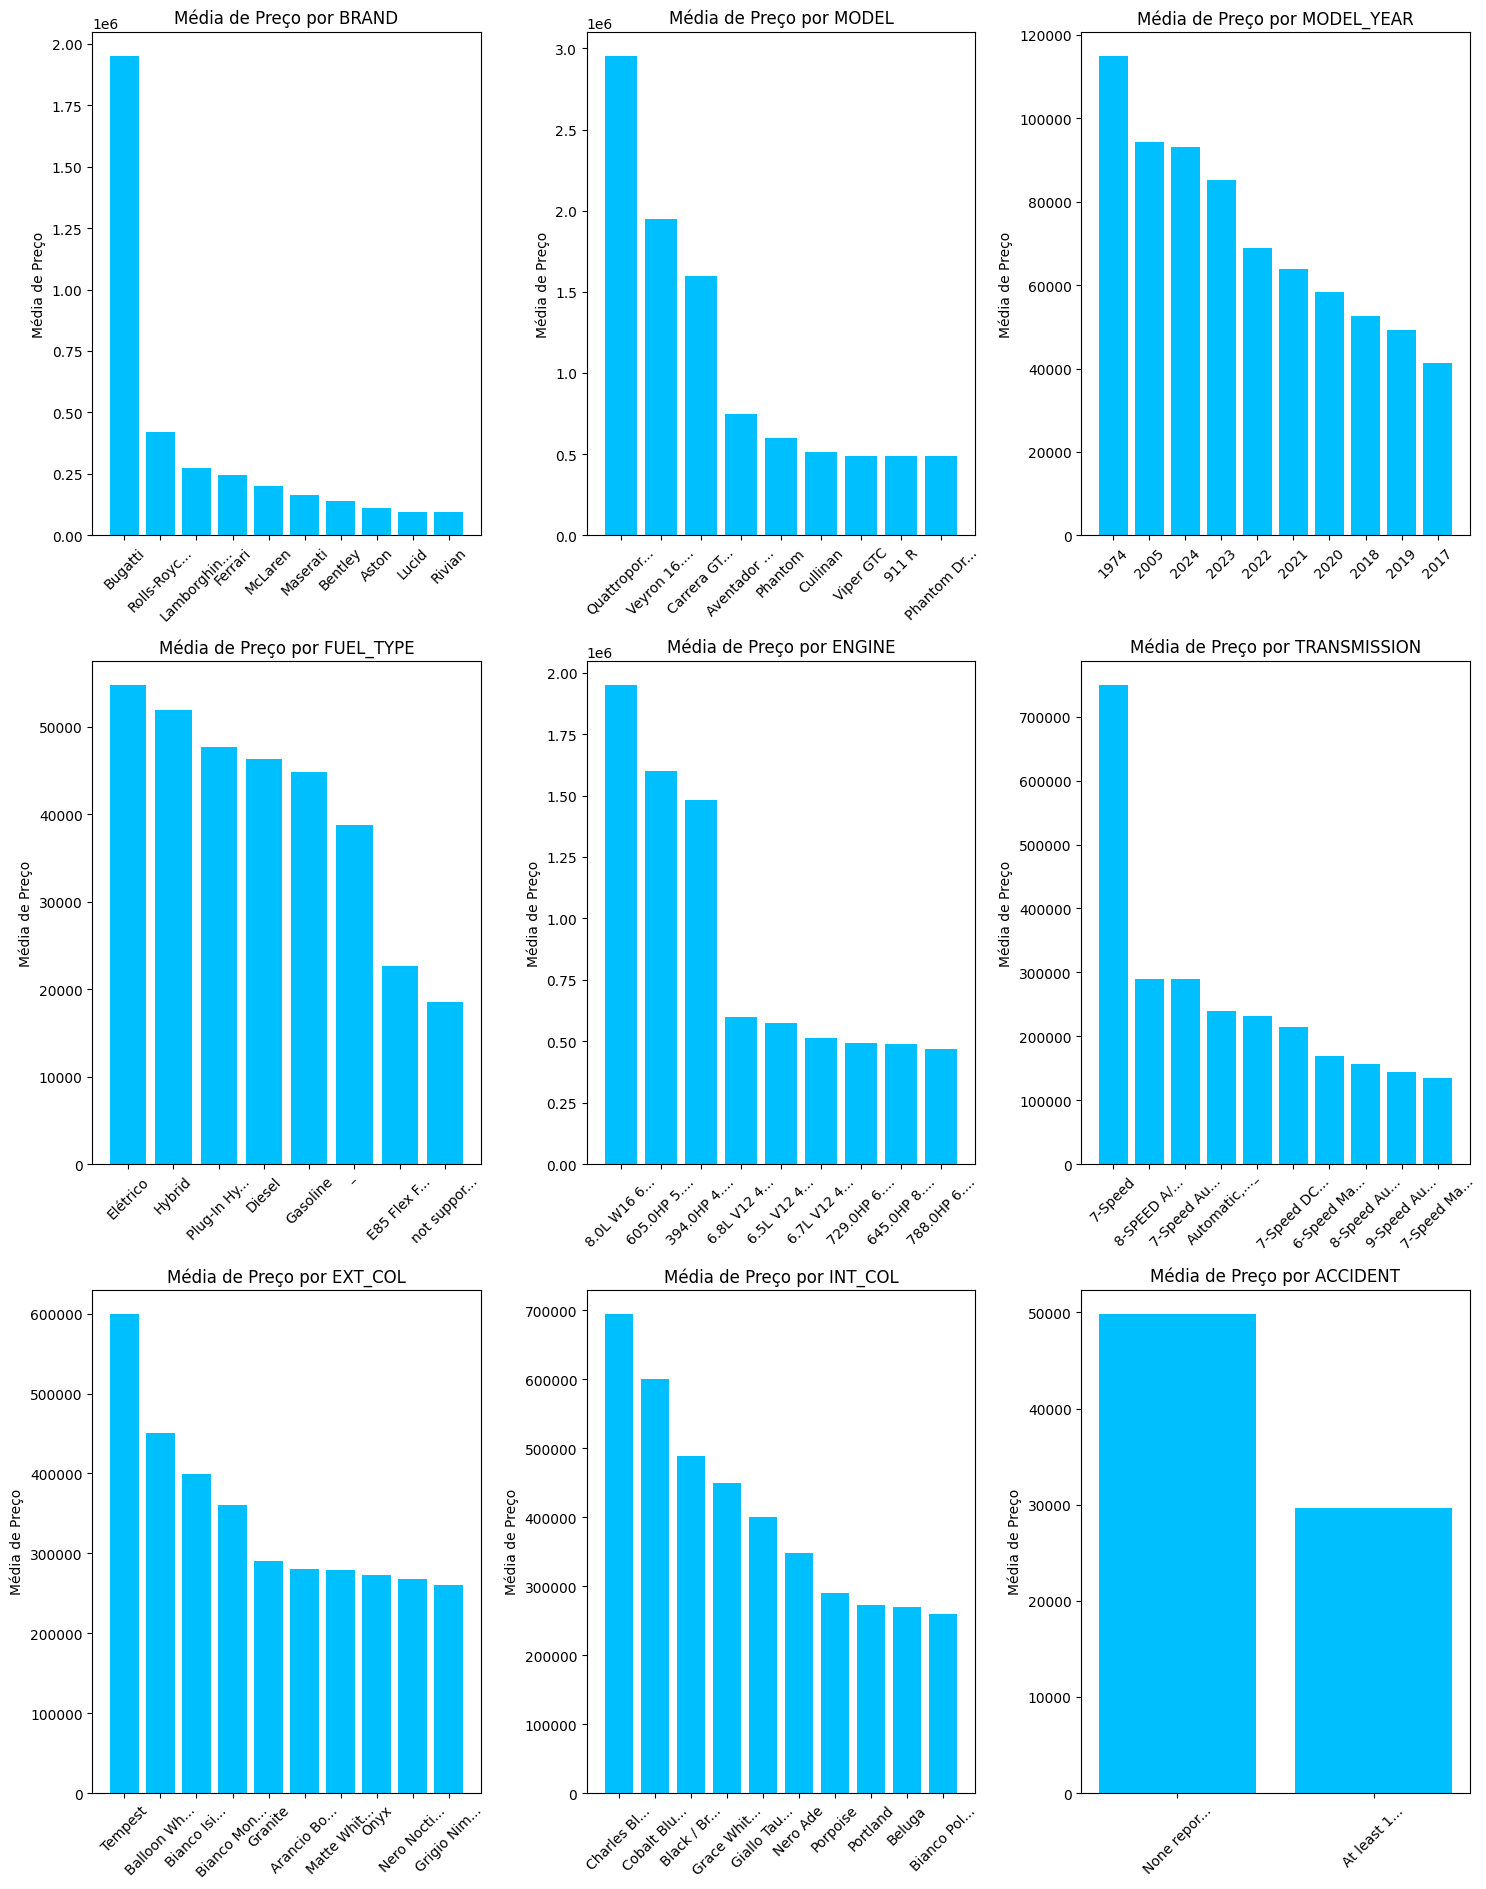

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [92]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

,brand,model,price
2484,Maserati,Quattroporte Base,2954083
1650,Bugatti,Veyron 16.4 Grand Sport,1950995
2564,Porsche,Carrera GT Base,1599000
2666,Lamborghini,Aventador SVJ Base,749950
572,Rolls-Royce,Cullinan,695000
2507,Rolls-Royce,Phantom,599995
26,Rolls-Royce,Phantom,599000
571,Lamborghini,Aventador S Base,491836
2030,Dodge,Viper GTC,489995
574,Porsche,911 R,489000


#### LINEPLOT

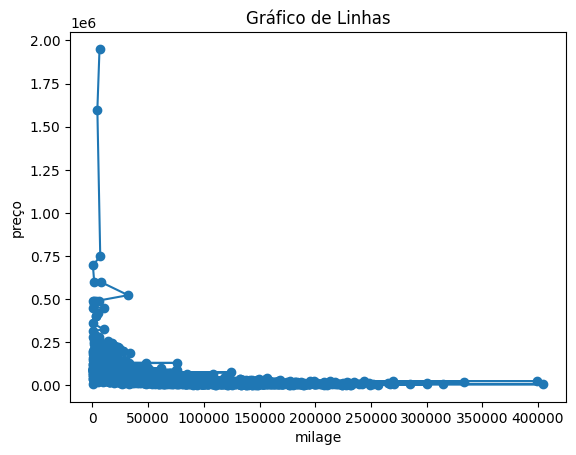

In [81]:
d = data.groupby('milage')['price'].mean().sort_values(ascending=False)
plt.plot(d.index, d.values, marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('milage')
plt.ylabel('preço')
plt.title('Gráfico de Linhas')

# Exibir o gráfico
plt.show()

#### o preço diminui a medida que o nº de quilometros aumenta

In [11]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

                          count          mean            std        min  \
brand         model_year                                                  
Acura         1993          1.0  9.020000e+04            NaN    90200.0   
              1995          1.0  1.099900e+04            NaN    10999.0   
              1998          1.0  5.500000e+03            NaN     5500.0   
              2003          1.0  4.000000e+03            NaN     4000.0   
              2005          3.0  6.499667e+03    1509.503340     4900.0   
              2006          1.0  1.499000e+04            NaN    14990.0   
              2007          1.0  7.700000e+03            NaN     7700.0   
              2008          1.0  1.000000e+04            NaN    10000.0   
              2010          2.0  1.144400e+04    3456.337946     9000.0   
              2011          2.0  8.750000e+03    4596.194078     5500.0   
              2012          1.0  1.900000e+04            NaN    19000.0   
              2013       

#### [ENGINE] novos atributos 

In [85]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

# data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')


In [86]:
data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3207 non-null   object 
 1   model             3207 non-null   object 
 2   model_year        3207 non-null   int64  
 3   milage            3207 non-null   int64  
 4   fuel_type         3060 non-null   object 
 5   engine            3207 non-null   object 
 6   transmission      3207 non-null   object 
 7   ext_col           3207 non-null   object 
 8   int_col           3207 non-null   object 
 9   accident          3118 non-null   object 
 10  clean_title       2740 non-null   object 
 11  price             3207 non-null   int64  
 12  Potencia          2578 non-null   float64
 13  Capacidade_Motor  3020 non-null   float64
 14  Numero_Cilindros  2851 non-null   float64
 15  Numero_Valvulas   395 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory 

In [46]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [17]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

2812

#### BARPLOT

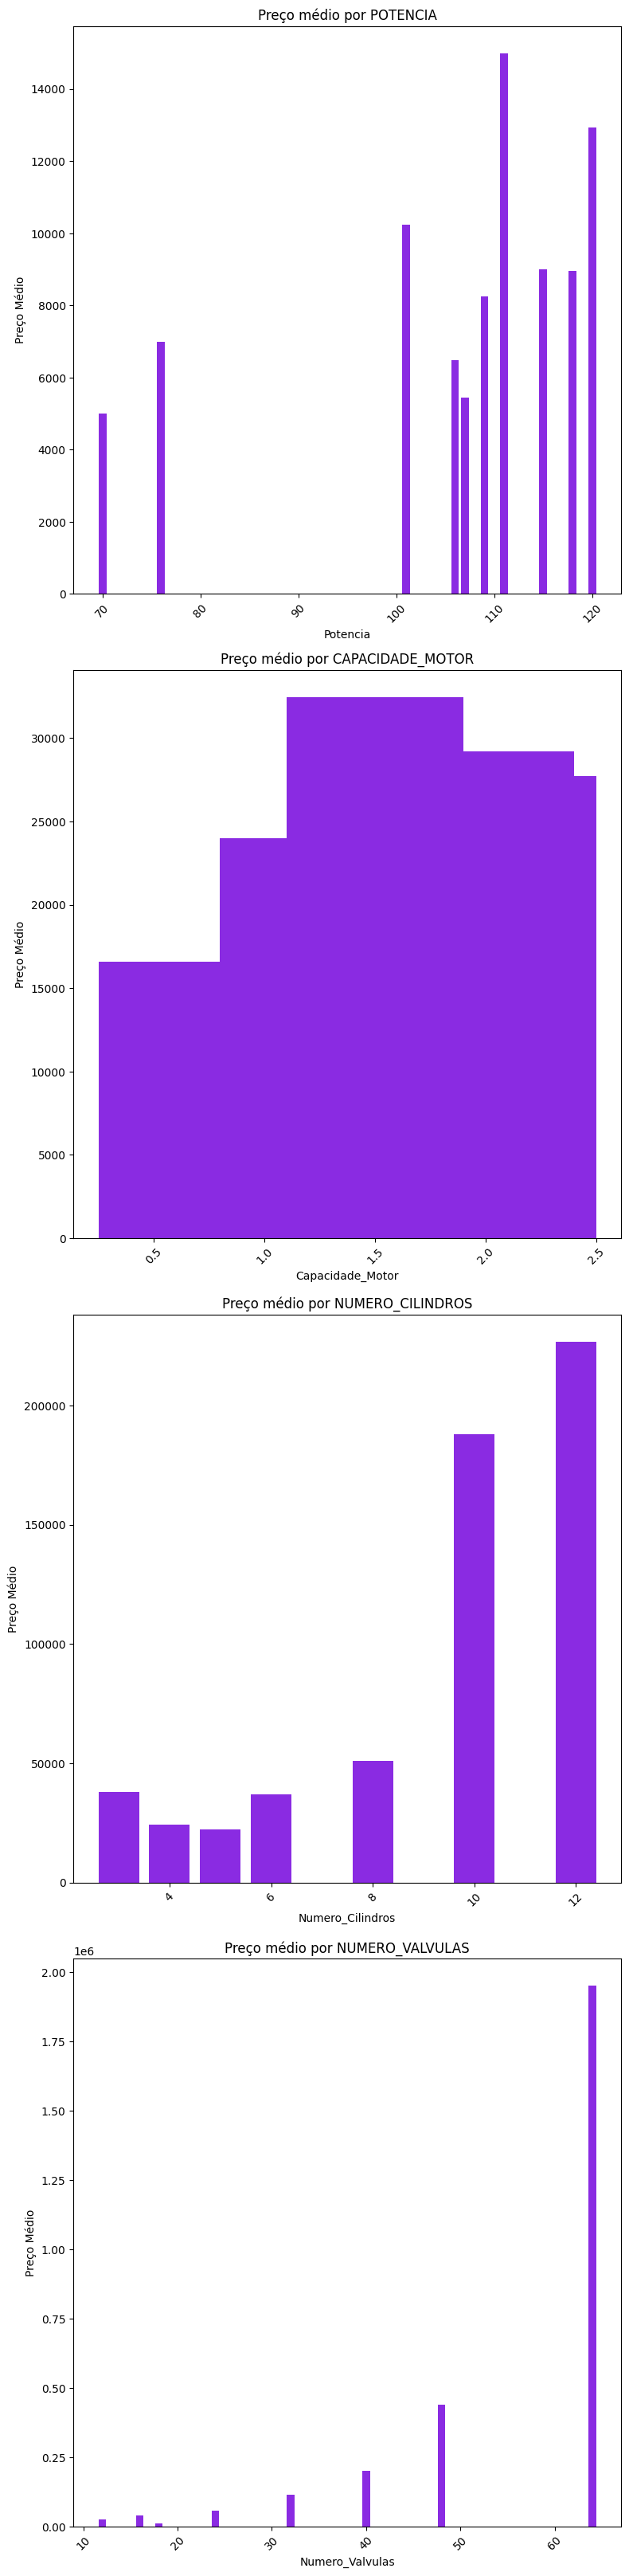

In [89]:
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']
fig, axs = plt.subplots(len(columns), 1, figsize=(8,8 * len(columns)))

# Iterating over the columns of the DataFrame
for i, column in enumerate(columns):  
    med = data.groupby(column)['price'].mean().head(10)
    axs[i].bar(med.index, med.values, color='blueviolet')

    axs[i].set_title(f'Preço médio por {column.upper()}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Preço Médio')
    axs[i].tick_params(axis='x', rotation=45)  
fig.delaxes(axs[-1])
plt.tight_layout()

plt.show()


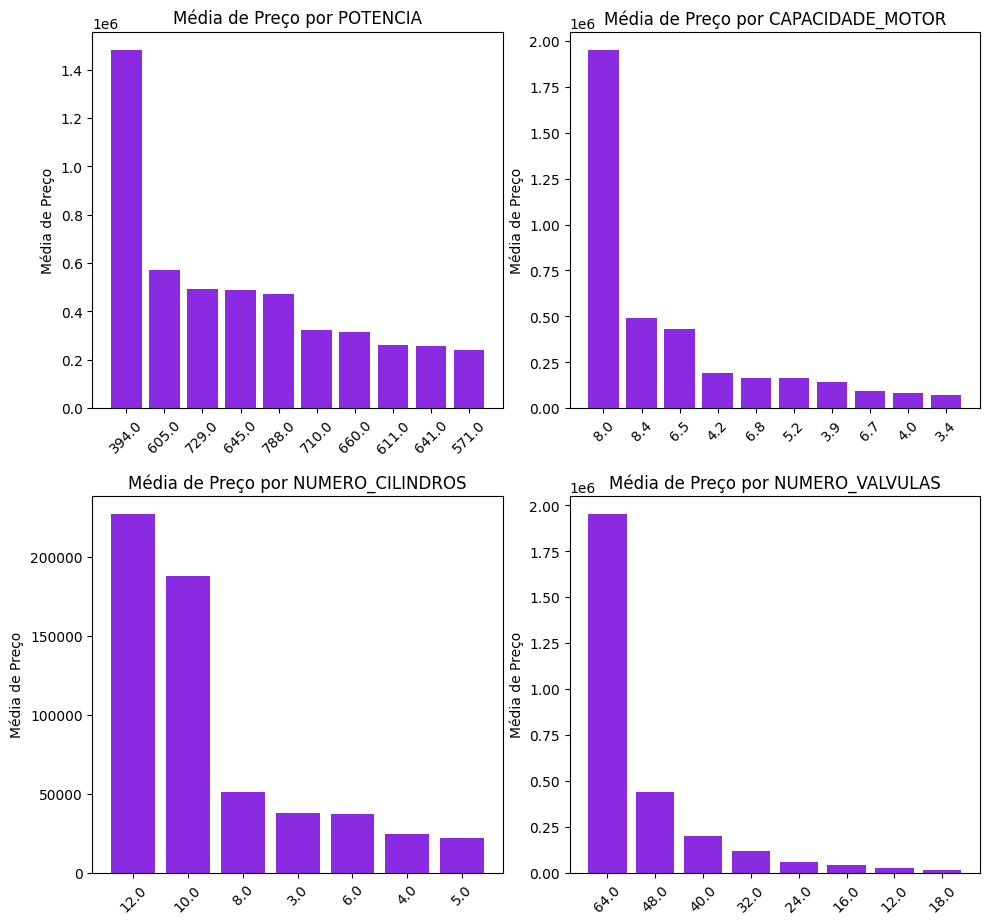

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [112]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

[nan, 12.0, 16.0, 18.0, 24.0, 32.0, 40.0, 48.0, 64.0]

In [113]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

[3.0, 4.0, 5.0, 6.0, 8.0, 10.0, nan, 12.0]

In [101]:
# len(data['Capacidade_Motor'].unique())
sorted(list(data['Capacidade_Motor'].unique()))

[0.65,
 1.0,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.8,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.7,
 2.8,
 2.9,
 3.0,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.2,
 4.3,
 4.4,
 4.6,
 4.7,
 4.8,
 5.0,
 5.2,
 5.3,
 5.5,
 5.6,
 6.0,
 6.1,
 6.2,
 6.6,
 6.8,
 nan,
 4.5,
 5.4,
 5.7,
 5.8,
 5.9,
 6.3,
 6.4,
 6.5,
 6.7,
 6.75,
 7.0,
 7.3,
 7.4,
 8.0,
 8.1,
 8.3,
 8.4]

In [100]:
sorted(data['Potencia'].unique())

[107.0,
 115.0,
 118.0,
 120.0,
 131.0,
 138.0,
 140.0,
 142.0,
 147.0,
 148.0,
 152.0,
 153.0,
 158.0,
 160.0,
 165.0,
 166.0,
 168.0,
 169.0,
 170.0,
 172.0,
 173.0,
 174.0,
 175.0,
 177.0,
 180.0,
 181.0,
 182.0,
 184.0,
 188.0,
 190.0,
 192.0,
 195.0,
 198.0,
 200.0,
 201.0,
 202.0,
 203.0,
 204.0,
 206.0,
 208.0,
 210.0,
 211.0,
 215.0,
 220.0,
 225.0,
 228.0,
 230.0,
 236.0,
 240.0,
 241.0,
 242.0,
 245.0,
 247.0,
 248.0,
 252.0,
 255.0,
 258.0,
 260.0,
 261.0,
 265.0,
 266.0,
 268.0,
 270.0,
 271.0,
 275.0,
 276.0,
 278.0,
 280.0,
 284.0,
 285.0,
 286.0,
 287.0,
 288.0,
 290.0,
 291.0,
 292.0,
 293.0,
 295.0,
 300.0,
 301.0,
 nan,
 70.0,
 76.0,
 101.0,
 106.0,
 109.0,
 111.0,
 121.0,
 122.0,
 126.0,
 130.0,
 132.0,
 134.0,
 136.0,
 139.0,
 141.0,
 143.0,
 146.0,
 150.0,
 154.0,
 155.0,
 156.0,
 159.0,
 161.0,
 162.0,
 164.0,
 167.0,
 171.0,
 178.0,
 179.0,
 185.0,
 186.0,
 187.0,
 189.0,
 191.0,
 197.0,
 199.0,
 205.0,
 207.0,
 212.0,
 214.0,
 217.0,
 219.0,
 221.0,
 224.0,
 226